# Descriptive figures

In [15]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [16]:
# paths
data_dir = os.path.abspath('../data')
fig_dir = os.path.abspath('../figures')

In [28]:
# plt.style.use('seaborn-v0_8-dark')
# plt.rcParams["font.family"] = 'times new roman'

# plot formatting
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# grid lines
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'both'

plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5

dcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pd.set_option('future.no_silent_downcasting', True)

# orders of magnitude
M = 1_000_000
B = 1_000_000_000
T = 1_000_000_000_000

In [29]:
# dark mode
def set_dark_mode(dark=True):
    '''
    Set dark mode for matplotlib plots.
    '''
    if dark:

        _background_color = '#1B1B1E'
        _edge_color = 'lightgray'

    else:

        _background_color = 'white'
        _edge_color = 'dimgrey'

    
    # set background colors
    keys = ['axes.facecolor', 'figure.facecolor']
    for key in keys:
        plt.rcParams[key] = _background_color

    # set edge colors
    keys = ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'axes.edgecolor', 'grid.color']
    for key in keys:
        plt.rcParams[key] = _edge_color

    
    return _background_color, _edge_color

_background_color, _edge_color = set_dark_mode(False)

# Canada's trade partners

## Clean data

In [30]:
# trade by trading partners
src = os.path.join(data_dir, 'CA-part.csv')
tp = pd.read_csv(src, index_col=[0, 1, 2])

In [31]:
# European countries

# European Union (EU)
# The EU is a single-market trade union, and sets trade policies for all member countries
EU = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
    'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
    'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
    ]

# European Economic Area (EEA)
# Free internal trade with EEA
# (though Canada has no trade with Liechtenstein)
EEA = ['Iceland', 'Liechtenstein', 'Norway'] + EU

# EAA plus UK and Switzerland (EEA+)
# EEA countries plus Switzerland: https://www.gov.uk/eu-eea
EEA_plus = EEA + ['United Kingdom', 'Switzerland']

In [32]:
# trade series with countries across time
cous = tp.pivot_table(index=['year', 'cou'], values=tp.columns, aggfunc='sum')
cous = cous.reset_index()
cous = cous.sort_values(['year', 'tradebalance'])

cous['cou'] = cous['cou'].str.split(' (', regex=False).str[0]

# make imports negative
cous['imports'] = -cous['imports']

# label EU and EEA countries
cous['eu'] = cous['cou'].isin(EU)
cous['eea'] = cous['cou'].isin(EEA)
cous['eea+'] = cous['cou'].isin(EEA_plus)


# aggregate EU (a single-market partner) and EEA+ countries
areas = [('eu', 'European Union'), ('eea+', 'EEA+ (West Europe)')]

for abbrev, name in areas:
    
    area = cous.pivot_table(index=['year', abbrev], values=tp.columns, aggfunc='sum')
    area = area.reset_index()
    area = area[area[abbrev]]
    area = area.rename(columns={abbrev : 'cou'})
    area['cou'] = name
    area[abbrev] = True

    cous = pd.concat([cous, area])
    

# remove individual EU countries after aggregating
cond = cous['eu'] & (cous['cou']!='European Union')
cous = cous[~cond].reset_index(drop=True)

# cous = cous.drop(columns=['eu', 'eea', 'eea+'])

# calculate shares
sdfs = []
cols = tp.columns
share_cols = [(c+'share').replace('ss', 's') for c in cols]

for year, sdf in cous.groupby('year'):

    
    cond = sdf['cou'] == 'Total All Countries'
    sdf[share_cols] = sdf[cols] / sdf.loc[cond, cols].iloc[0]

    sdfs.append(sdf)

cous = pd.concat(sdfs)

Saved: /home/qcx201/Projects/CAtrade/figures/03-import_partners-dark-annotated.png


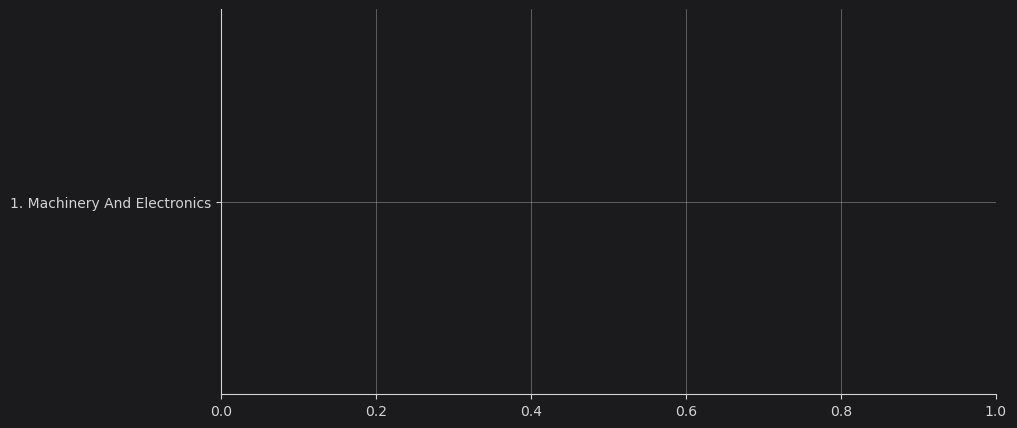

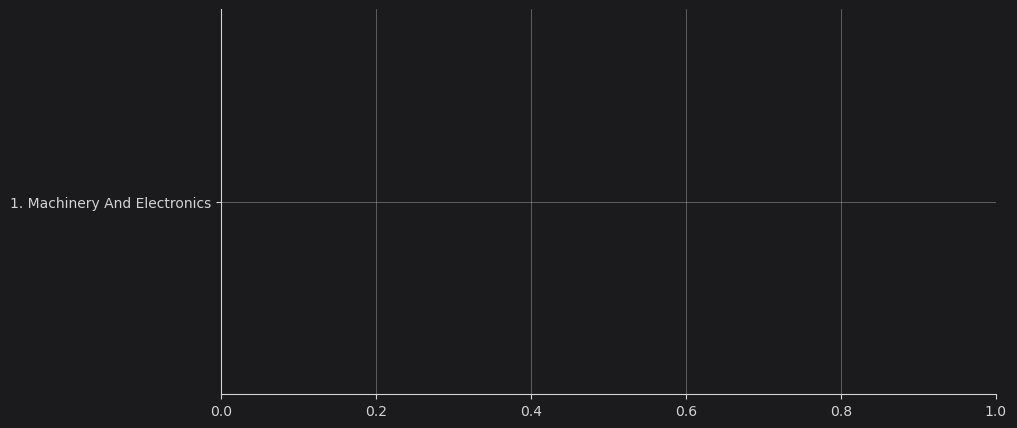

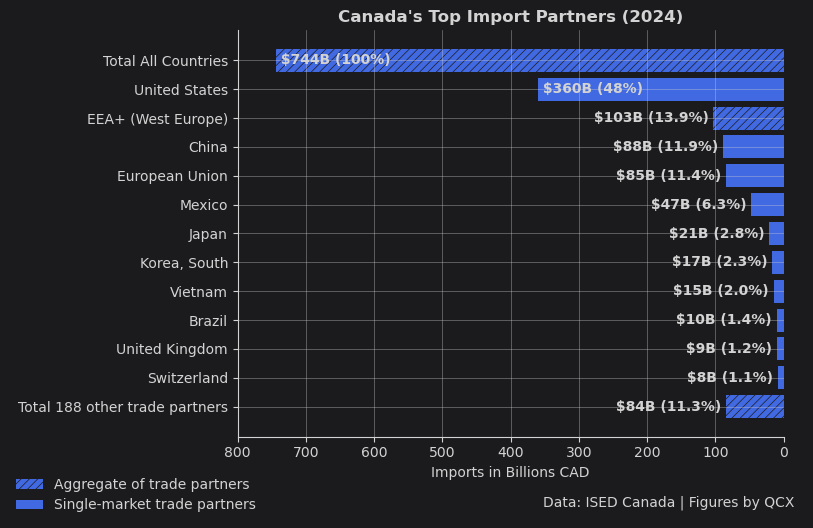

,cou,imports
0,Total All Countries,-744.148423
1,United States,-359.702858
2,EEA+ (West Europe),-103.101211
3,China,-88.397183
4,European Union,-84.856715
5,Mexico,-47.07908
6,Japan,-21.118049
7,"Korea, South",-16.77144
8,Vietnam,-14.630059
9,Brazil,-10.19631


Saved: /home/qcx201/Projects/CAtrade/figures/03-export_partners-dark-annotated.png


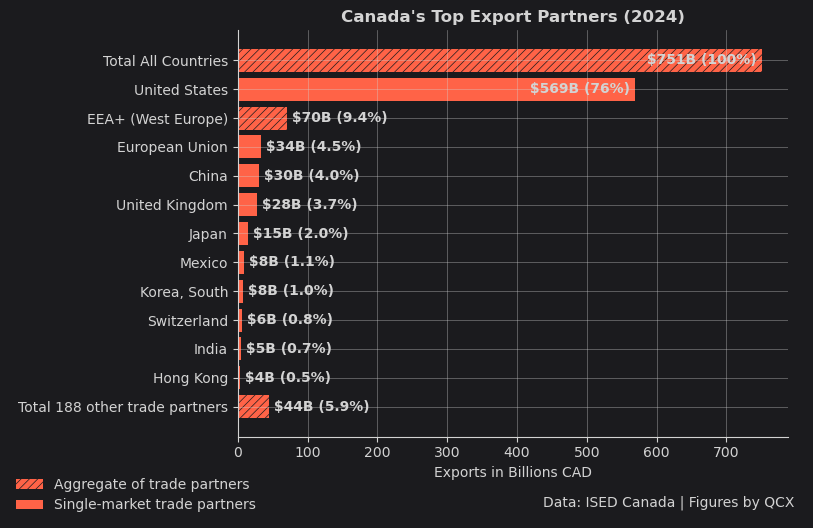

,cou,exports
0,Total All Countries,750.702179
1,United States,569.252073
2,EEA+ (West Europe),70.248974
3,European Union,33.579627
4,China,29.808881
5,United Kingdom,28.142693
6,Japan,14.819743
7,Mexico,8.462675
8,"Korea, South",7.567014
9,Switzerland,6.217219


Saved: /home/qcx201/Projects/CAtrade/figures/03-import_partners-annotated.png


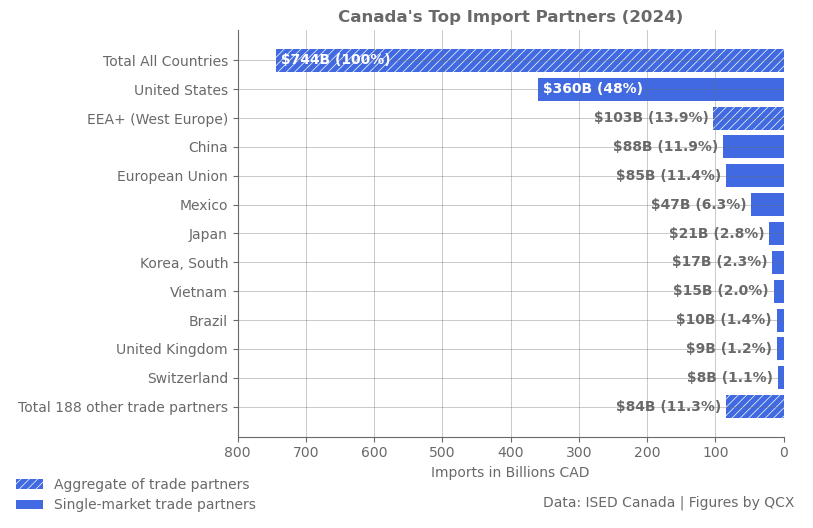

,cou,imports
0,Total All Countries,-744.148423
1,United States,-359.702858
2,EEA+ (West Europe),-103.101211
3,China,-88.397183
4,European Union,-84.856715
5,Mexico,-47.07908
6,Japan,-21.118049
7,"Korea, South",-16.77144
8,Vietnam,-14.630059
9,Brazil,-10.19631


Saved: /home/qcx201/Projects/CAtrade/figures/03-export_partners-annotated.png


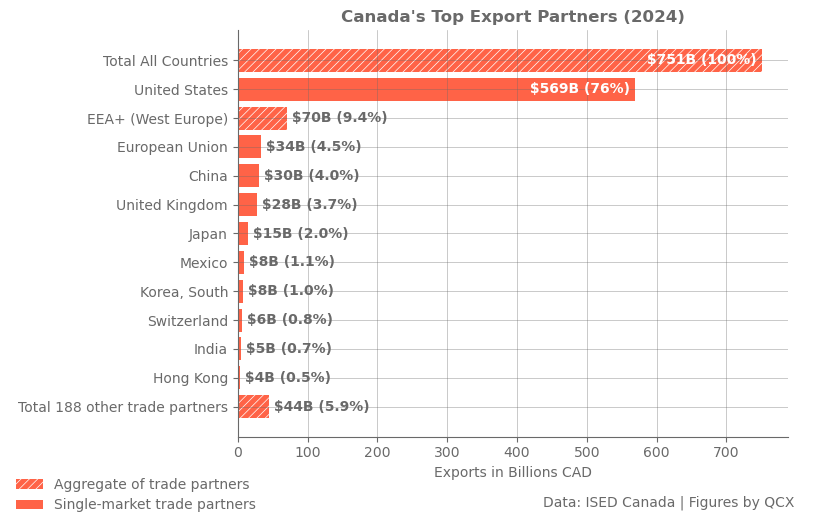

,cou,exports
0,Total All Countries,750.702179
1,United States,569.252073
2,EEA+ (West Europe),70.248974
3,European Union,33.579627
4,China,29.808881
5,United Kingdom,28.142693
6,Japan,14.819743
7,Mexico,8.462675
8,"Korea, South",7.567014
9,Switzerland,6.217219


Saved: /home/qcx201/Projects/CAtrade/figures/03-import_partners-dark.png


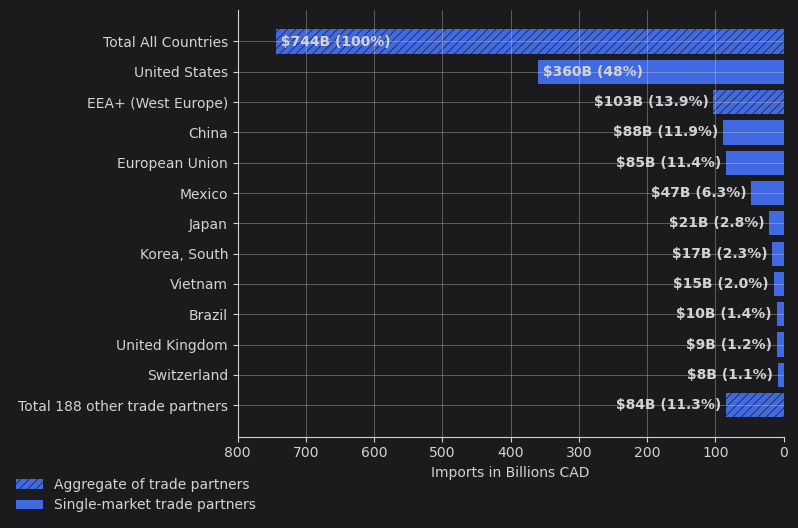

,cou,imports
0,Total All Countries,-744.148423
1,United States,-359.702858
2,EEA+ (West Europe),-103.101211
3,China,-88.397183
4,European Union,-84.856715
5,Mexico,-47.07908
6,Japan,-21.118049
7,"Korea, South",-16.77144
8,Vietnam,-14.630059
9,Brazil,-10.19631


Saved: /home/qcx201/Projects/CAtrade/figures/03-export_partners-dark.png


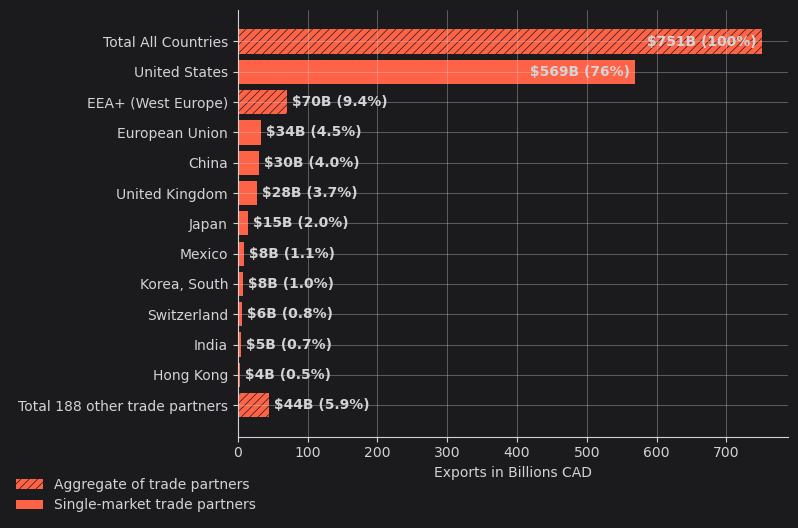

,cou,exports
0,Total All Countries,750.702179
1,United States,569.252073
2,EEA+ (West Europe),70.248974
3,European Union,33.579627
4,China,29.808881
5,United Kingdom,28.142693
6,Japan,14.819743
7,Mexico,8.462675
8,"Korea, South",7.567014
9,Switzerland,6.217219


Saved: /home/qcx201/Projects/CAtrade/figures/03-import_partners.png


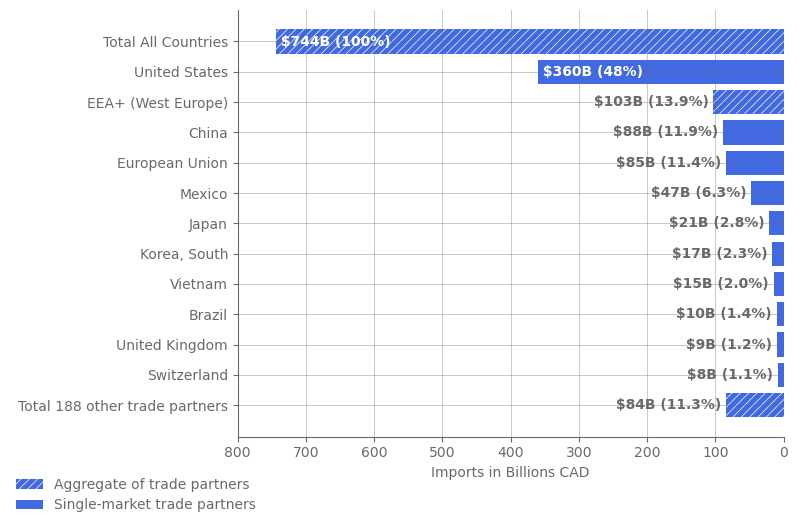

,cou,imports
0,Total All Countries,-744.148423
1,United States,-359.702858
2,EEA+ (West Europe),-103.101211
3,China,-88.397183
4,European Union,-84.856715
5,Mexico,-47.07908
6,Japan,-21.118049
7,"Korea, South",-16.77144
8,Vietnam,-14.630059
9,Brazil,-10.19631


Saved: /home/qcx201/Projects/CAtrade/figures/03-export_partners.png


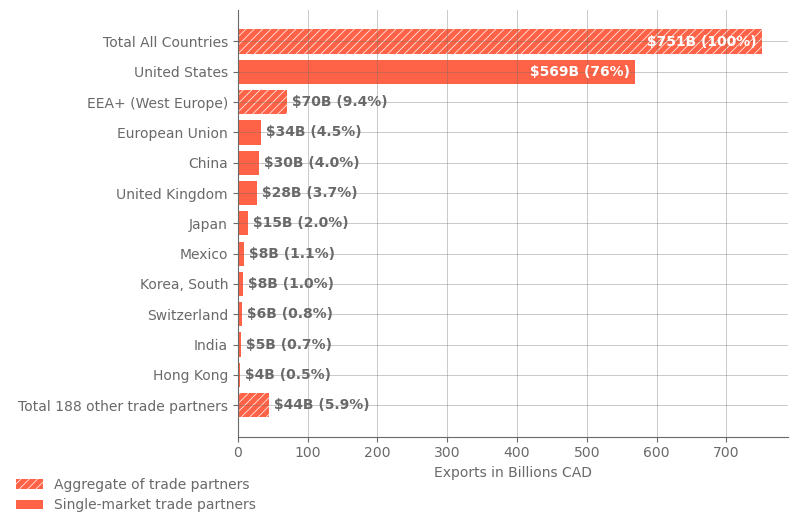

,cou,exports
0,Total All Countries,750.702179
1,United States,569.252073
2,EEA+ (West Europe),70.248974
3,European Union,33.579627
4,China,29.808881
5,United Kingdom,28.142693
6,Japan,14.819743
7,Mexico,8.462675
8,"Korea, South",7.567014
9,Switzerland,6.217219


In [50]:
# number of top
top = 10
year = 2024

# hatch length
plt.rcParams['hatch.linewidth'] = 0.5

# trade in latest year
cond = cous['year'] == year
df = cous[cond]

data_dict = {}

# top gross import partners
title, col = f'Canada\'s Top Import Partners ({year})', 'imports'
annotate = '''\
In 2024, about half of all imports to 🇨🇦
came from the 🇺🇸.
🇪🇺+🇬🇧+🇨🇭: ~14% of imports to 🇨🇦.
🇨🇳: ~12% of imports 🇨🇦.
'''

data = df.sort_values(col)
data_dict[title] = {'data' : data, 'col' : col, 'annotate' : annotate}

# top gross export partners
title, col = f'Canada\'s Top Export Partners ({year})', 'exports'
annotate = '''\
About three-quarters of all exports from Canada went to the US in 2024.
'''

data = df.sort_values(col, ascending=False)
data_dict[title] = {'data' : data, 'col' : col, 'annotate' : annotate}

for annotated in (True, False):

    for dark in (True, False):
        
        # set dark mode
        _background_color, _edge_color = set_dark_mode(dark)
        
        for title, params in data_dict.items():
            
            data = params['data']
            col = params['col']
            comment = params['annotate']
            
            # add 2 for all countries and EEA+
            nhead = top if 'net' in title.lower() else top + 2
            sdf = data.head(nhead)

            others = data.iloc[nhead:]
            nothers = len(others)
            others = others.sum(axis=0).to_frame().T
            others[['year', 'cou']] = 2024, f'Total {nothers} other trade partners'
            sdf = pd.concat([sdf, others]).reset_index(drop=True)

            x, y = sdf['cou'], sdf[col] / B

            fig, ax = plt.subplots(figsize=(8, 5))
            
            # formatting
            kwargs = {
                'color' : 'tomato' if 'export' in title.lower() else 'royalblue',
                'fill' : False if 'net' in title.lower() else True,
                'linewidth' : 3
            }
            kwargs['edgecolor'] = kwargs['color'] if 'net' in title.lower() else None

            # plot bar
            bars = ax.barh(x, y, **kwargs)
            
            # add value labels
            for i, v in enumerate(y):
            
                absv = abs(v)
                p = absv/max(abs(y))

                kwargs = dict(va='center', color=_edge_color, fontsize=10, weight='bold')

                ha = 'right' if ('import' in title.lower()) else 'left'
                
                ps = f'({p:.1%})'
                if p > 0.3:
                    ha='right' if (ha=='left') else 'left'
                    kwargs['color'] = 'lightgray' if dark else 'white'
                    ps = f'({p:.0%})'
                
                ax.text(v, i, f' ${absv:,.0f}B {ps} ', ha=ha, **kwargs)

            # ax.set_title(title) # remove title for article
            ax.set_xlabel(f'{col.title()} in Billions CAD')
            
            # reverse negative sign for imports
            if 'import' in title.lower():
                # xlim = ax.get_xlim()
                xticks = ax.get_xticks()
                ax.set_xticks(xticks, -xticks.astype(int))
                # ax.set_xlim(xlim)

            # add hatch to bar for total all countries export/import
            if 'net' not in title.lower():
                for i in (0, 2, -1):
                    bars[i].set_hatch('/'*4)
                    bars[i].set_linewidth(0)
                    bars[i].set_edgecolor(_background_color)

                fig.legend((bars[0], bars[1]), ('Aggregate of trade partners', 'Single-market trade partners'),
                        bbox_to_anchor=(0, 0), loc='center left', frameon=False)

            # invert order of countries
            fig.gca().invert_yaxis()
            
            # add annotation
            if annotated:

                # overhead comments
                # fig.text(0.1, 1.05, comment, ha='left', va='bottom', weight='bold',
                #         fontsize=16, color='white' if dark else 'black')

                # set title
                ax.set_title(title, fontsize=12, weight='bold')

                # set data footnote
                fig.text(1, 0, 'Data: ISED Canada | Figures by QCX  ', ha='right', va='top')
                
        
            # save figures
            n = 4 if 'net' in title.lower() else 3
            tag = '_'.join(title.split()[-n:-1])
            
            tag += '-dark' if dark else ''
            tag += '-annotated' if annotated else ''
        
            file = f'03-{tag}.png'.lower()

            fig.tight_layout()

            dst = os.path.join(fig_dir, file)
            plt.savefig(dst, bbox_inches='tight')

            print('Saved:', dst)


            plt.show()
            display(pd.merge(x, y, left_index=True, right_index=True).reset_index(drop=True))

Saved: /home/qcx201/Projects/CAtrade/figures/03-importshare-dark.png


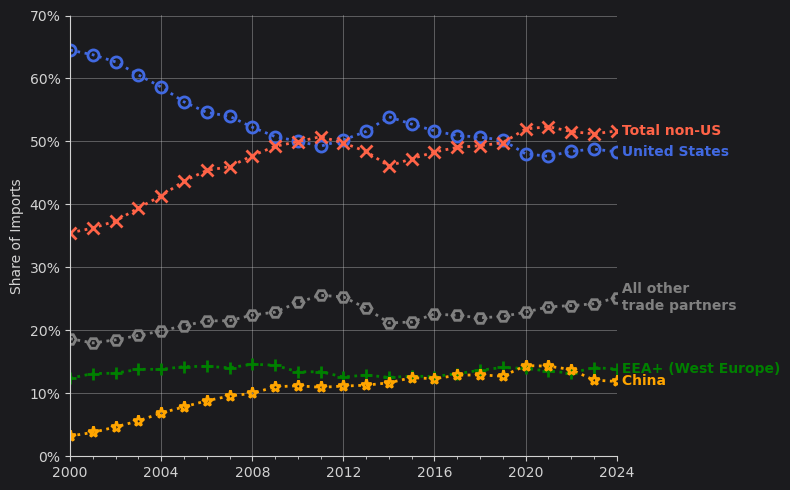

Saved: /home/qcx201/Projects/CAtrade/figures/03-exportshare-dark.png


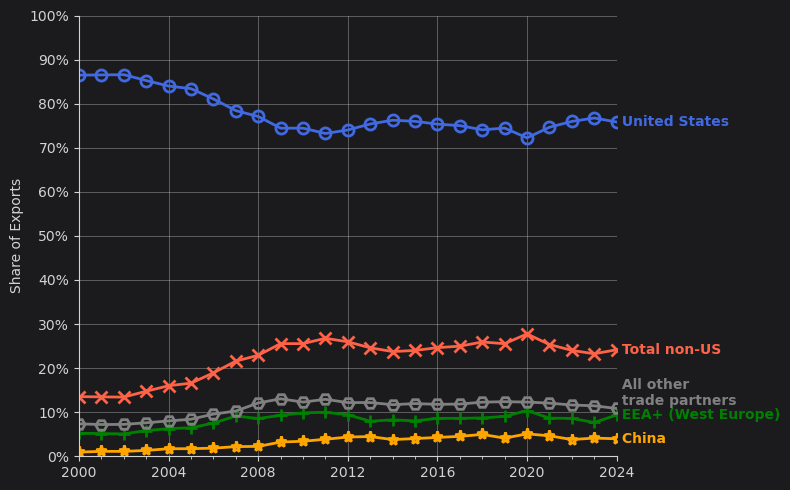

Saved: /home/qcx201/Projects/CAtrade/figures/03-importshare.png


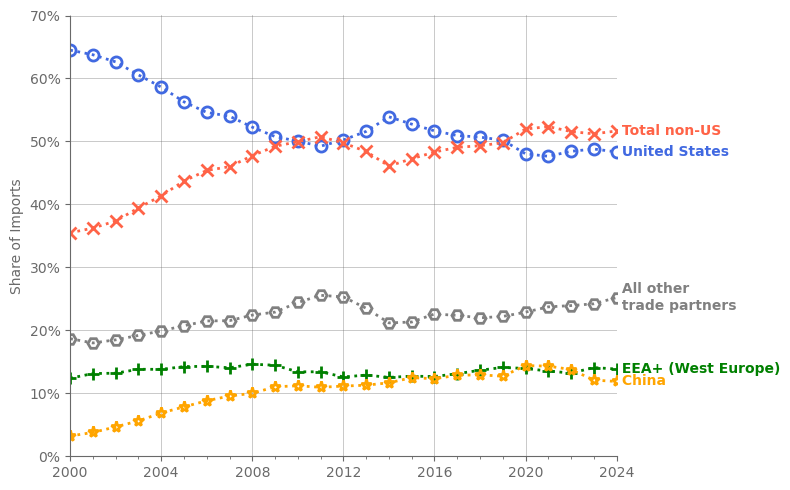

Saved: /home/qcx201/Projects/CAtrade/figures/03-exportshare.png


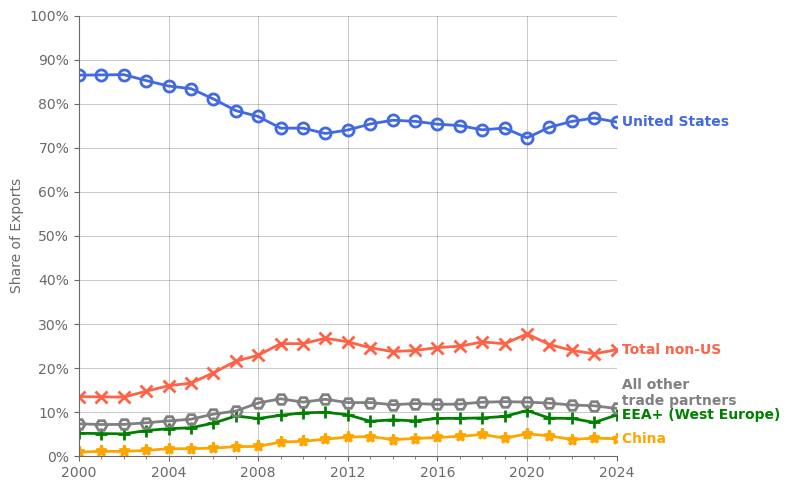

In [51]:
partners = ['United States', 'EEA+ (West Europe)', 'China']

cols = ['importshare', 'exportshare']

# aggregate other trade partners
cond1 = ~(cous['cou'].isin(partners)) # already listed partners
cond2 = ~(cous['eea+'].fillna(True).astype(bool)) # EEA+ countries
cond3 = ~cous['cou'].str.contains('total', case=False) # aggregates
cond4 = ~cous['cou'].str.contains('import', case=False) # re-imports

cond = cond1 & cond2 & cond3 & cond4

sdf = cous[cond]

others = sdf.groupby('year').sum()
others = others.reset_index()

label = f'All other\n trade partners'
others['cou'] = label
partners.append(label)

# add non-US import/export share
cond = cous['cou'] == 'United States'
non_us = 1 - (cous.loc[cond, ['year']+cols].set_index('year'))
non_us = non_us.reset_index()

label = 'Total non-US'
non_us['cou'] = label
partners.append(label)

# create final dataset
cond = cous['cou'].isin(partners)
data = pd.concat([cous[cond], others, non_us])

data = data.sort_values(['year', 'cou'])

# account
linestyles = [':', '-', '-.']

# partners
markers = ['o', '+', '*', 'H', 'x']
colors = ['royalblue', 'green', 'orange', 'gray', 'tomato']


for dark in (True, False):
    
    # set dark mode
    _background_color, _edge_color = set_dark_mode(dark)
    
    for i, col in enumerate(cols):
        
        fig, ax = plt.subplots(figsize=(8, 5))

        for j, cou in enumerate(partners):
                
                cond = data['cou'] == cou
                x, y = data.loc[cond, 'year'], data.loc[cond, col]

                ax.plot(x, y, lw=2, ls=linestyles[i],
                        marker=markers[j], fillstyle='none',
                        markersize=8, markeredgewidth=2,
                        label=cou, color=colors[j])
                
                ax.set_xlim(2000, 2024)
                ax.set_xticks(range(2000, 2025, 4))
                ax.set_xticks(range(2000, 2025), minor=True)
                
                xend, yend = x.dropna().iloc[-1], y.dropna().iloc[-1]

                va = 'bottom' if (('other' in cou) and ('export' in col)) else 'center'
                ax.text(xend, yend, f' {cou}', va=va,
                        ha='left', color=colors[j],
                        fontweight='bold'
                        )

        # set ylim and 10% yticks
        _, ymax = ax.get_ylim()
        step = 0.1
        ax.set_yticks(np.arange(0, ymax+step, step))
        ax.set_ylim(0, ymax)
        ax.yaxis.minorticks_off()

        ax.set_ylabel(f'Share of {col.replace("hare", "").title()}')
        ticks = ax.get_yticks()
        ax.set_yticks(ticks, [f'{t:.0%}' for t in ticks])
        ax.yaxis.minorticks_off()

        fig.tight_layout()
        # fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3, frameon=False)
        
        tag = f'03-{col}'
        if dark:
                tag += '-dark'

        dst = os.path.join(fig_dir, f'{tag}.png')
        
        fig.savefig(dst, bbox_inches='tight')
        print('Saved:', dst)
        
        plt.show()

# By sector figures

## Clean


In [53]:
# Canada's trade by sector/product

# keep only US and world
prods = tp.reset_index()
cond = prods['cou'].isin(['United States', 'Total All Countries'])
prods = prods[cond]
prods['imports'] = -prods['imports']

# add sector HS2 codes
src = os.path.join(data_dir, 'HS2_codes.csv')
codes = pd.read_csv(src)
split = codes['code'].str.split(' - ')
codes['hs2'] = split.str[0].astype(int)

prods = pd.merge(prods, codes, on='hs2', how='left')
prods

prods = prods.pivot_table(index=['year', 'sec', 'hs2', 'code'], columns='cou', values=tp.columns, aggfunc='sum')
cols = [(b, a) for a, b in prods.columns.tolist()]
prods.columns = pd.MultiIndex.from_tuples(cols)
prods = prods[sorted(cols)]

non_us = prods['Total All Countries'] - prods['United States'] 
cols = [('Non-US', c) for c in tp.columns]
cols = pd.MultiIndex.from_tuples(cols)
prods[cols] = non_us

## Plot

Saved: /home/qcx201/Projects/CAtrade/figures/03-sector-imports-dark.png


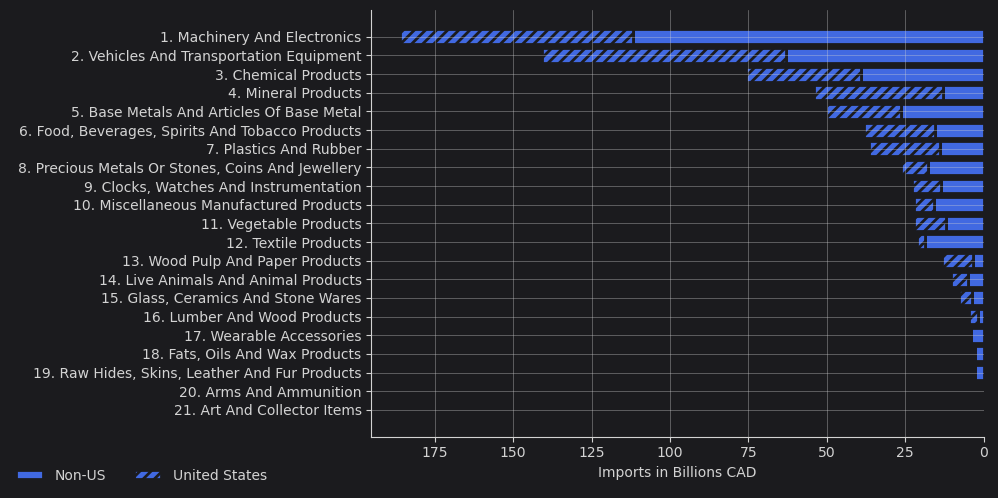

Saved: /home/qcx201/Projects/CAtrade/figures/03-sector-exports-dark.png


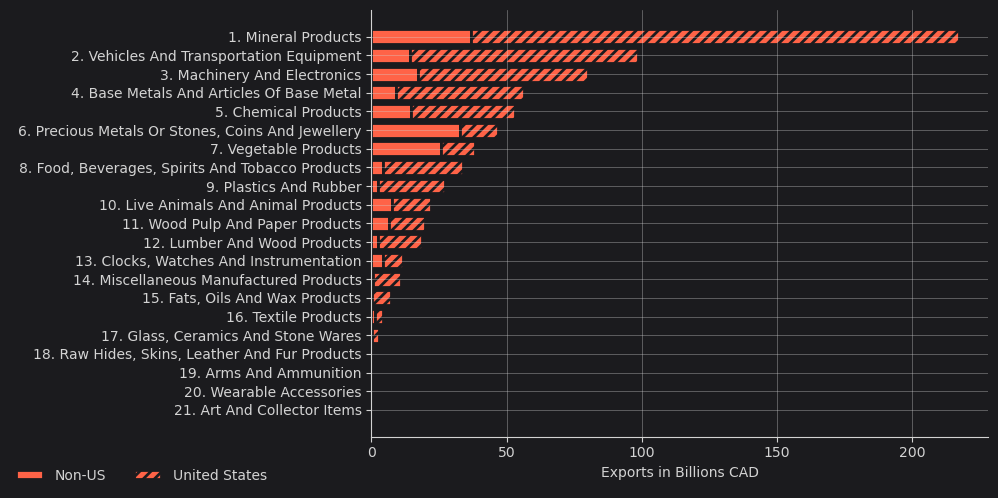

Saved: /home/qcx201/Projects/CAtrade/figures/03-sector-imports.png


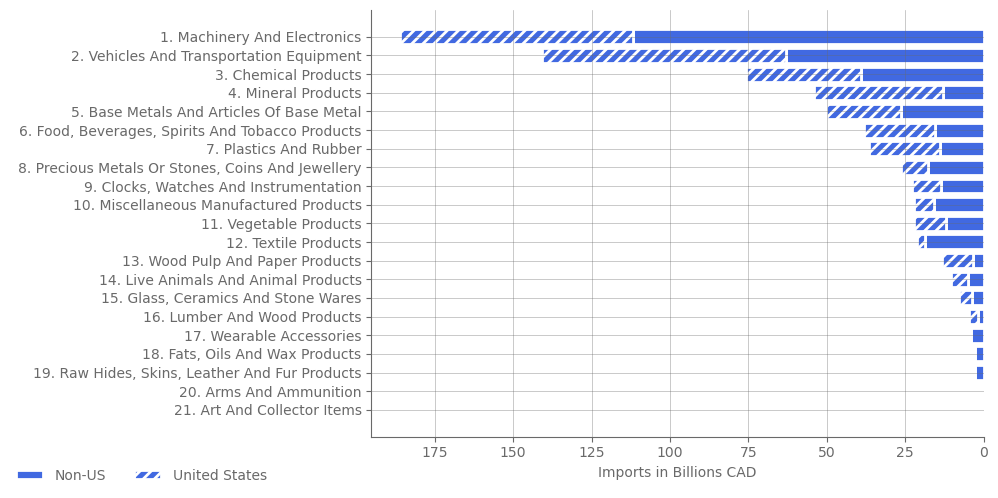

Saved: /home/qcx201/Projects/CAtrade/figures/03-sector-exports.png


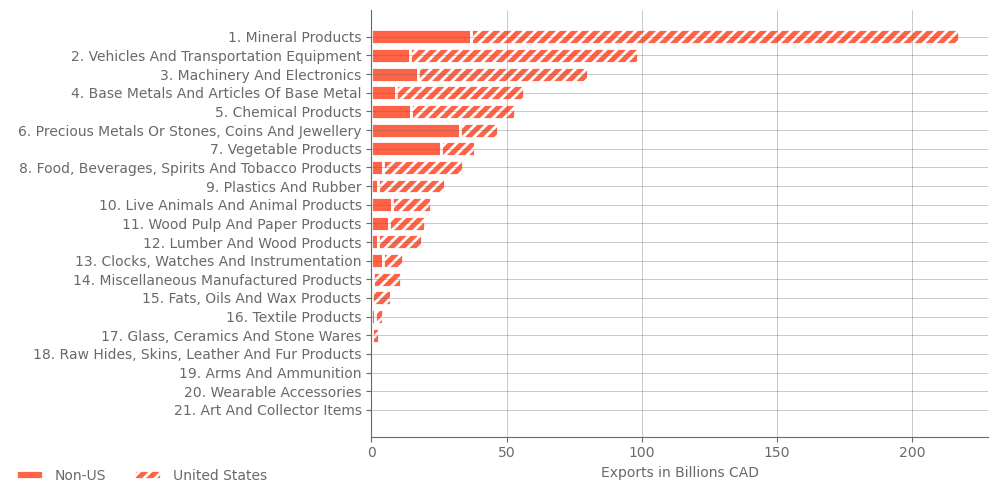

In [56]:
# hatch length
plt.rcParams['hatch.linewidth'] = 2

secs = prods.pivot_table(index=['year', 'sec'], values=prods.columns, aggfunc='sum')

for year, sdy in secs.groupby('year'):
    continue

for dark in (True, False):

    # set dark mode
    _background_color, _edge_color = set_dark_mode(dark)
        
    for j, col in enumerate(['imports', 'exports']):

        fig, ax = plt.subplots(figsize=(10, 5))

        ascending = True if col=='imports' else False
        sdy = sdy.sort_values([('Total All Countries', col)], ascending=ascending)


        areas = ['Non-US', 'United States']
        colors = ['royalblue', 'tomato']
        hatches = ['', '/'*3]
        left = np.zeros(len(sdy))

        for i, area in enumerate(areas):

            sdf = sdy[area].reset_index()

            sdf['rank'] = range(1, len(sdf)+1)
            split = sdf['sec'].str.split(' - ')
            sdf['sector'] = sdf['rank'].astype(str) + '. ' + split.str[-1].str.title()

            x, y = sdf['sector'], sdf[col] / B

            ax.barh(x, y, label=area,
                    color=colors[j], left=left, linewidth=2,
                    hatch=hatches[i], edgecolor=_background_color,
                    )
            
            left += y.to_numpy()


        ax.set_xlabel(f'{col.title()} in Billions CAD')
        fig.gca().invert_yaxis()

        if col == 'imports':
    
            xlim = ax.get_xlim()
            xticks = ax.get_xticks()
            ax.set_xticks(xticks, -xticks.astype(int))
            ax.set_xlim(xlim)


        fig.tight_layout()
        fig.legend(bbox_to_anchor=(0, 0), ncol=2, loc='lower left', frameon=False)

        tag = f'03-sector-{col}'
        if dark:
            tag += '-dark'
            
        dst = os.path.join(fig_dir, f'{tag}.png')
        fig.savefig(dst, bbox_inches='tight')
        print('Saved:', dst)

        plt.show()
        

# Trade by Province

In [38]:
# Breakdown trade by sector with top trader